## Hierarchical_code_demo

Let's say that you're asked to perform hierarchical clustering analysis on a new dataset - how would we go about it?

We're going to be using a dataset that details the snacks sold at basketball games. We will perform a hierarchical clustering analysis on this dataset.

We want to understand the relationship between the profit and the calories of the products sold.

In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster, cophenet
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# load the data
df = pd.read_csv('./datasets/sales_basketball_game.csv')
# lang = pd.read_csv('./datasets/lang.csv')
df.drop_duplicates(inplace=True)
df.sort_values('Calories', ascending=False).head()

,Item,Category,Price,Profit,Actual Profit,Calories
14,Nachos,Hot Food,3.0,0.50,1.5,560
2,Popcorn,Hot Food,5.0,0.80,4.0,500
3,Pizza,Hot Food,2.0,0.25,0.5,480
1,Hamburger,Hot Food,3.0,0.67,2.0,320
6,Chocolate Dipped Cone,Frozen Treats,3.0,0.50,1.5,300


In [3]:
df.dtypes

Item              object
Category          object
Price            float64
Profit           float64
Actual Profit    float64
Calories           int64
dtype: object

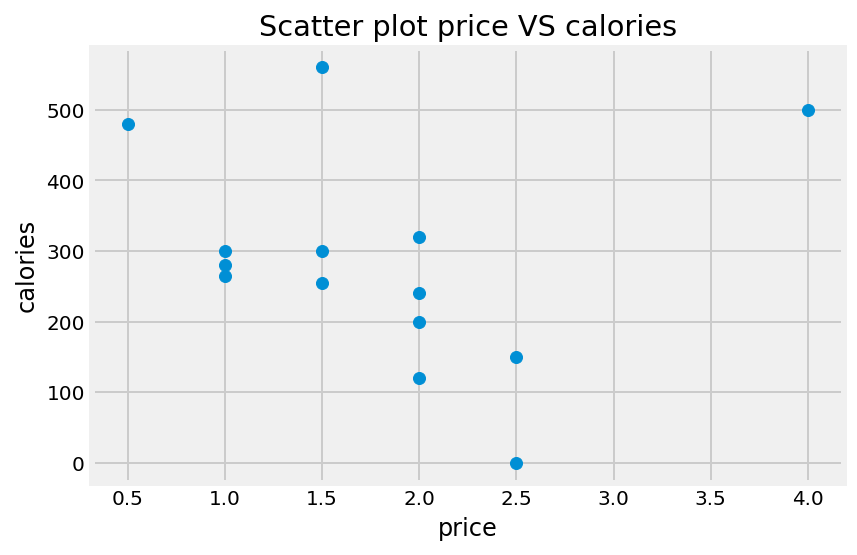

In [4]:
# scatter to guess clusters
plt.scatter(df.iloc[:,4], df.iloc[:,5])
plt.title('Scatter plot price VS calories')
plt.xlabel('price')
plt.ylabel('calories')
plt.show()

In [5]:
# Now, let's convert our data to a matrix to pass to the clustering 
# algorithm - the matrix makes it easier for our algorithm to compute distance:
X = df.iloc[:,2:].as_matrix(columns=None)

/Users/aymericflaisler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
# We'll implement the actual clustering algorithm using the ward method:
Z = linkage(X, 'ward')

In [7]:
Z

array([[  6.        ,  11.        ,   1.11803399,   2.        ],
       [  5.        ,   8.        ,  10.02528803,   2.        ],
       [  2.        ,   3.        ,  20.53174372,   2.        ],
       [  9.        ,  15.        ,  23.09889175,   3.        ],
       [  1.        ,  14.        ,  23.11828713,   3.        ],
       [  7.        ,  13.        ,  30.00834717,   2.        ],
       [ 12.        ,  17.        ,  32.70705352,   4.        ],
       [  0.        ,  19.        ,  75.07084854,   3.        ],
       [ 10.        ,  16.        ,  80.83574395,   3.        ],
       [ 18.        ,  20.        ,  86.41617024,   7.        ],
       [  4.        ,  21.        , 191.87729569,   4.        ],
       [ 23.        ,  24.        , 366.65834616,  11.        ],
       [ 22.        ,  25.        , 634.92553762,  14.        ]])

In [8]:
# We can calculate the cophenetic correlation coefficient to see how 
# well our algorithm has measured the distances between the points:
c, coph_dists = cophenet(Z, pdist(X))

# let's 'c' how it did
c

0.8057214778508544

In [9]:
coph_dists

array([366.65834616, 634.92553762, 634.92553762, 191.87729569,
       366.65834616, 366.65834616,  75.07084854, 366.65834616,
       366.65834616, 634.92553762, 366.65834616, 366.65834616,
        75.07084854, 634.92553762, 634.92553762, 366.65834616,
        86.41617024,  23.11828713, 366.65834616,  86.41617024,
        86.41617024, 634.92553762,  23.11828713,  86.41617024,
       366.65834616,  20.53174372, 634.92553762, 634.92553762,
       634.92553762, 634.92553762, 634.92553762, 634.92553762,
        80.83574395, 634.92553762, 634.92553762, 634.92553762,
       634.92553762, 634.92553762, 634.92553762, 634.92553762,
       634.92553762, 634.92553762,  80.83574395, 634.92553762,
       634.92553762, 634.92553762, 366.65834616, 366.65834616,
       191.87729569, 366.65834616, 366.65834616, 634.92553762,
       366.65834616, 366.65834616, 191.87729569,  86.41617024,
       366.65834616,  10.02528803,  23.09889175, 634.92553762,
        86.41617024,  32.70705352, 366.65834616, 366.65

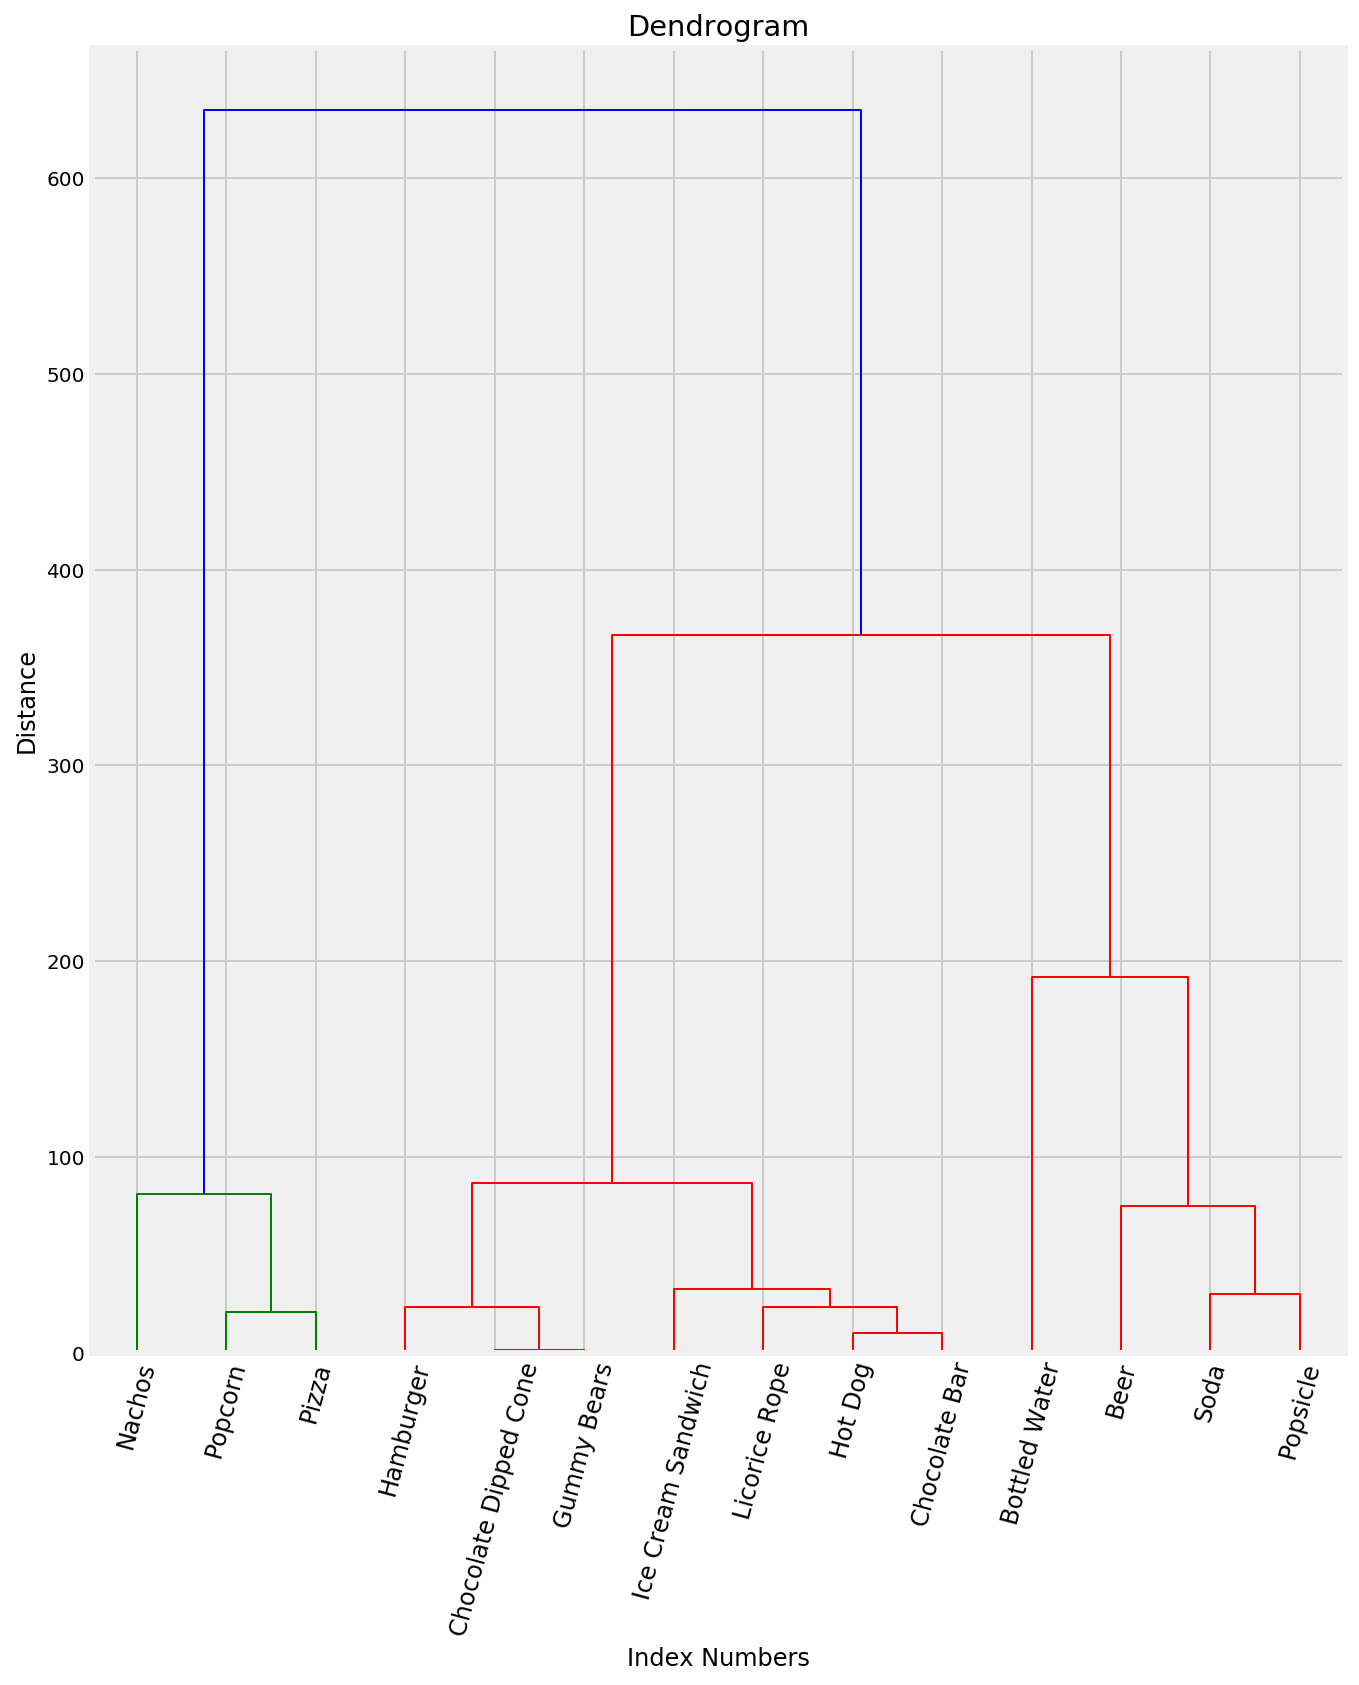

In [10]:
# now let's make our dendrogram

# Override the default linewidth.
plt.rcParams['lines.linewidth'] = 1

# import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(10,12))
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    labels=df.Item.values,
    leaf_rotation=75.,
    leaf_font_size=12.,
)
plt.show()


### Retrieve the Clusters

Now, let's finally have a look at how to retrieve the clusters, for different ways of determining k. We can use the fcluster function.

In [11]:
# we can see that no links exist above a distance of 700
# so we will set maximum distance at 200 and use the fclusters function 
# from scipy.cluster.hierarchy, which will return our cluster ID's.
max_dist = 100
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([3, 2, 1, 1, 4, 2, 2, 3, 2, 2, 1, 2, 2, 3], dtype=int32)

### Visualizing Your Clusters

If you're lucky enough and your data is very low dimensional, you can actually visualize the resulting clusters very easily:

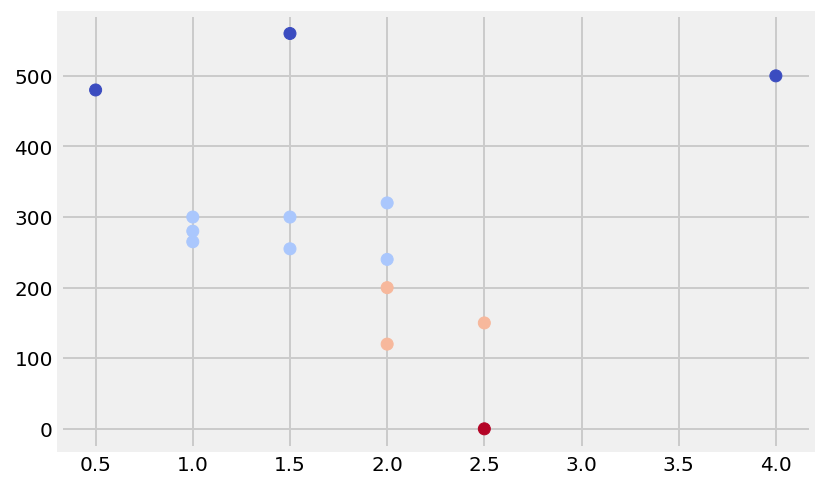

In [12]:
# Let's plot our data and assign the class labels as the color:
plt.scatter(X[:, 2], X[:, 3], c=clusters, cmap='coolwarm')
plt.show()


### Dendrogram Truncation

As you might have noticed, the above is pretty big for 150 samples already and you probably have way more in real scenarios, so let me spend a few seconds on highlighting some other features of the dendrogram() function:

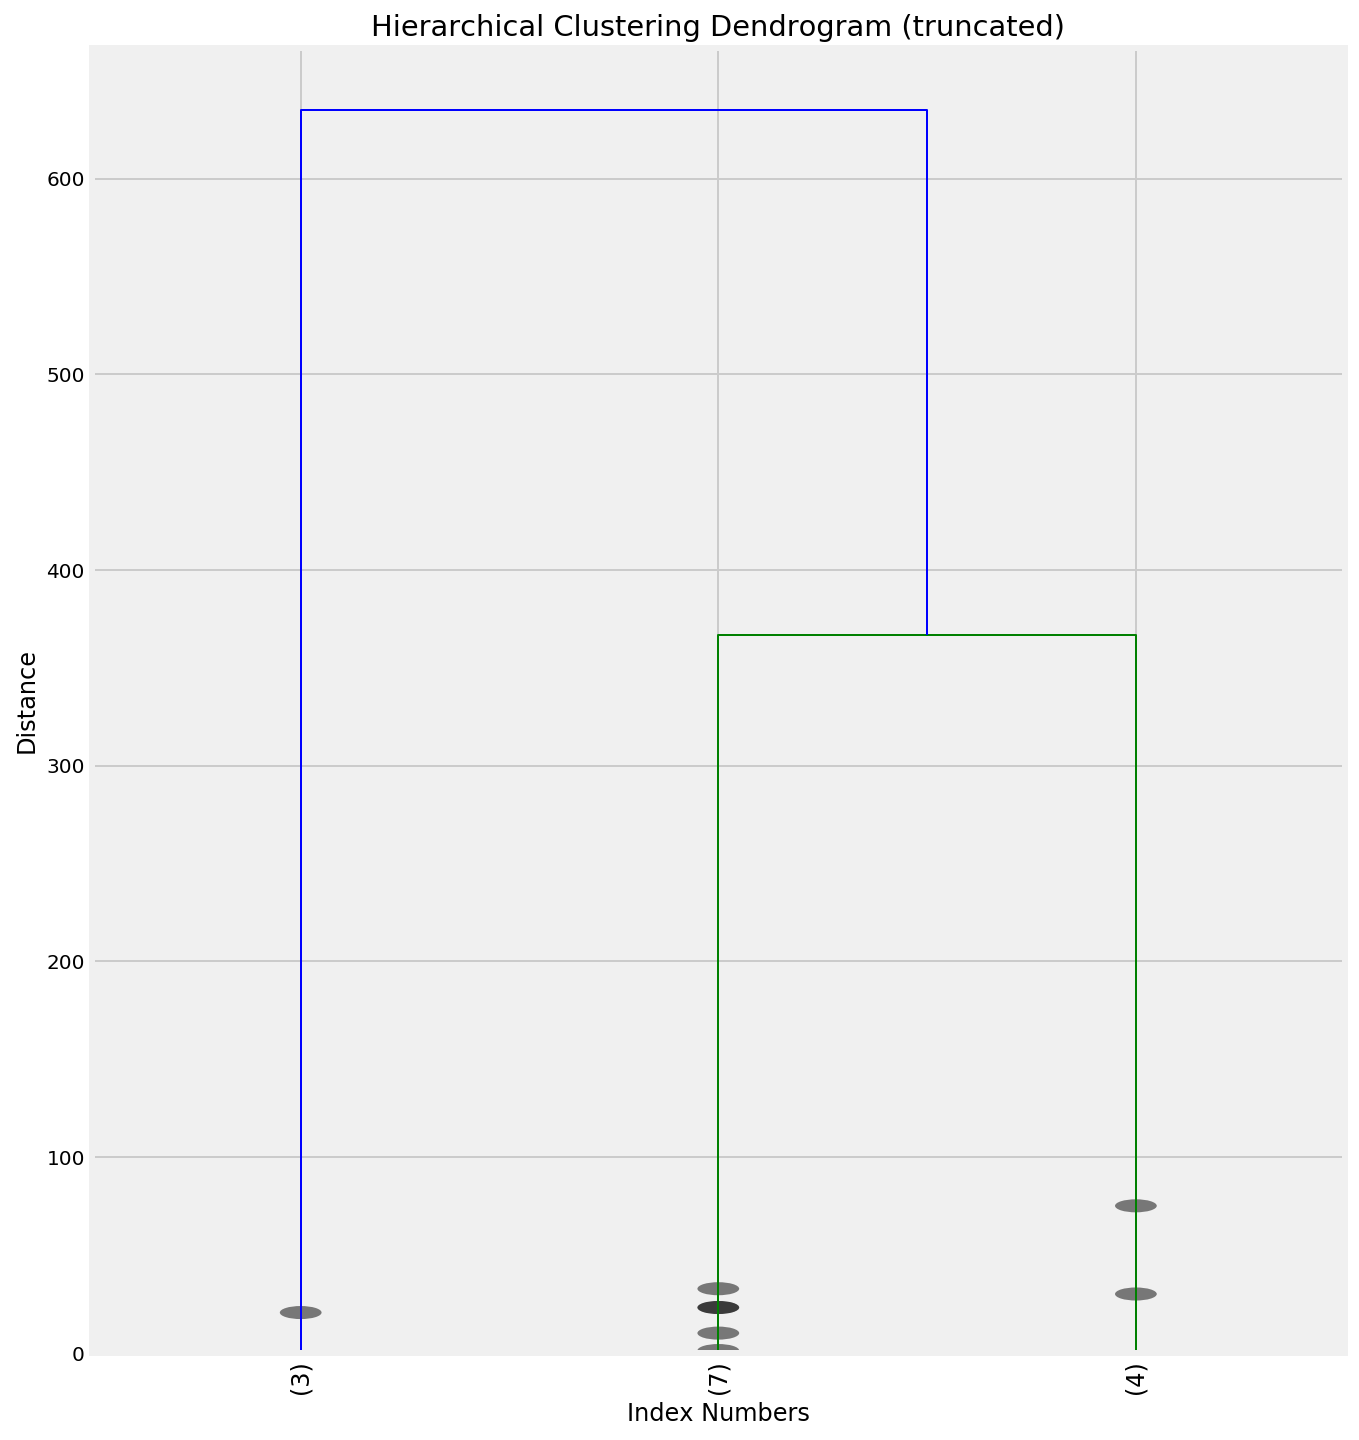

In [13]:
fig, ax = plt.subplots(figsize=(10,12))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    labels=df.Item.values,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

### Using the inconsistency with the elbow method

In [14]:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 16.56208989,   9.24443385,   2.        ,   0.70710678],
       [ 12.11816056,  15.55652819,   2.        ,   0.70710678],
       [ 30.00834717,   0.        ,   1.        ,   0.        ],
       [ 21.94374443,  11.38491965,   3.        ,   0.94540053],
       [ 52.53959785,  31.86400029,   2.        ,   0.70710678],
       [ 50.68374383,  42.6413675 ,   2.        ,   0.70710678],
       [ 29.41395411,  30.05392504,   6.        ,   1.89666461],
       [ 98.98549713,  83.54233619,   3.        ,   1.11191287],
       [ 84.00985622, 113.97957391,  10.        ,   2.47981704],
       [130.53052496, 189.02283061,  12.        ,   2.66843434]])

The inconsistent function returns data about the links in an (m-1)-by-4 matrix, whose columns are described in the following table:

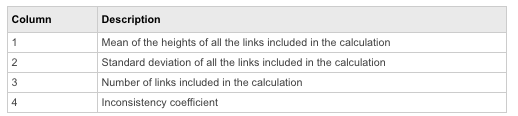

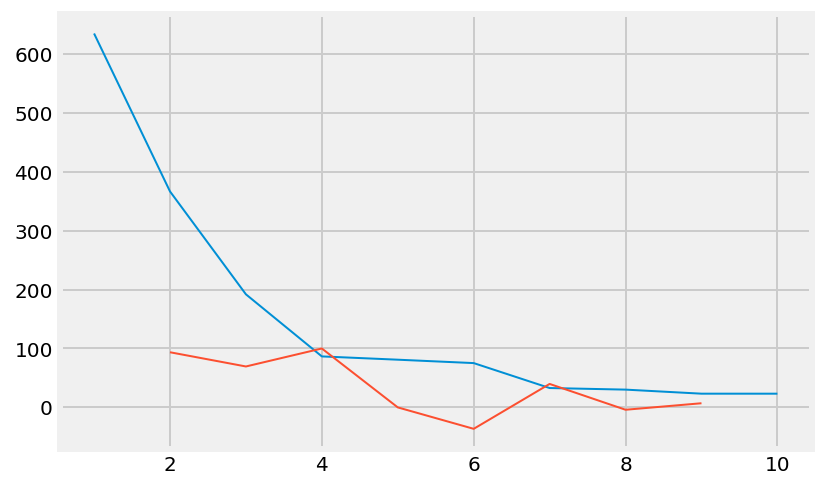

clusters: 4


In [15]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2) 
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

#### Further Reading:

The scipy hierarchical clustering module: http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html
The scipy distance computation docs: http://docs.scipy.org/doc/scipy/reference/spatial.distance.html
The scipy hierarchical clustering module docs often refer to the MATLAB docs saying that a certain function is similar to the MATLAB one. Here's their hierarchical clustering tutorial: http://mathworks.com/help/stats/hierarchical-clustering.html